#### The purpose of the analysis section is to investigate various variables, and identify those which will be useful for modeling


In [ ]:
!pip install hdbscan

In [250]:
import scipy 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [439]:


def calc_pct_revenue(dataframe, x_key, y_key):
## This the the function which is used later on for calculating what percent of users is a given cateogry generate revenue
## For example, with x_key=TrafficType y_key=Revenue, it will break down what percent 
## of users from each traffic type generate revenue

    x_data = dataframe[x_key]
    y_data = dataframe[y_key]


    combined_data = list(zip(x_data, y_data))

    # Counting True/False for each category in x_key
    revenue_counts = {}
    for category, value in combined_data:
        if category not in revenue_counts:
            revenue_counts[category] = {'True': 0, 'False': 0}
        if value:
            revenue_counts[category]['True'] += 1
        else:
            revenue_counts[category]['False'] += 1

    # Calculating percentage of True values
    percent_data = {}
    for category in revenue_counts:
        total = revenue_counts[category]['True'] + revenue_counts[category]['False']
        percent_true = (revenue_counts[category]['True'] / total) * 100 if total > 0 else 0
        percent_data[category] = percent_true
        
    return percent_data,revenue_counts

    
def plot_pct_revenue(dataframe,x_key,y_key):
    
#Function to plot pct revenue    
    percent_data,revenue_counts= calc_pct_revenue(dataframe,x_key,y_key)
    category_labels = list(revenue_counts.keys()) #grab the different categories out of the dictionary
    
    # looks repetetive but it's needed to make the bars
    true_counts = [revenue_counts[category]['True'] for category in category_labels]
    false_counts = [revenue_counts[category]['False'] for category in category_labels]

    
    label_range = range(len(category_labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(label_range, true_counts, width, label='True', edgecolor="black")
    rects2 = ax.bar([p + width for p in label_range], false_counts, width, label='False', edgecolor="black")


    max_height = max(true_counts + false_counts) #used mostly as a scale factor 

    ## I did use GPT to help me attach specific labels to each bar as I didn't have this trick in my bag
    for i in label_range:
        pct_label_height = true_counts[i] + max_height * 0.05 
        ax.text(i, # labels x location
                pct_label_height, # labels y location
                f"{percent_data[category_labels[i]]:.2f}%",
                ha='center', va='bottom',
                rotation=90, 
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

    
    ax.set_xticks([p + width / 2 for p in label_range]) # makes sure that the text doesn't overlap
    ax.set_xticklabels(category_labels) 
    ax.set_ylabel('Counts')
    ax.set_title(f'Percent {y_key} by {x_key}')
    ax.legend()

    plt.show()
    
    return percent_data

def visualize_continuous_revenue_relationship(key,df):
    sns.boxplot(x="Revenue",y=key,data=df)
    plt.title(key+' boxplot, focus on revenue')
    print("Mean " + key + " for revenue producing customers: " +str(np.mean(df[df['Revenue']==True][key])))
    print("Mean " + key + " for non-revenue producing customers: " +str(np.mean(df[df['Revenue']==False][key])))

In [357]:
df=pd.read_csv("cleaned_online_shopping_data.csv")

In [358]:
columns_to_drop=["level_0","index","Unnamed: 0"]

In [361]:
df = df.drop(columns_to_drop, axis=1)

In [382]:
df.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'TotalVisits', 'TotalTime', 'TimeBin'],
      dtype='object')

Using data idenfitication provided by Gabe


In [383]:

continuous_variables=["Administrative_Duration","ProductRelated_Duration","Informational_Duration","BounceRates","ExitRates"]
discrete_variables=["Administrative","Informational","ProductRelated","Month","Region","TrafficType","VisitorType","Weekend","Revenue"]

Next to get a general idea of the shape of the distributions, plot histograms

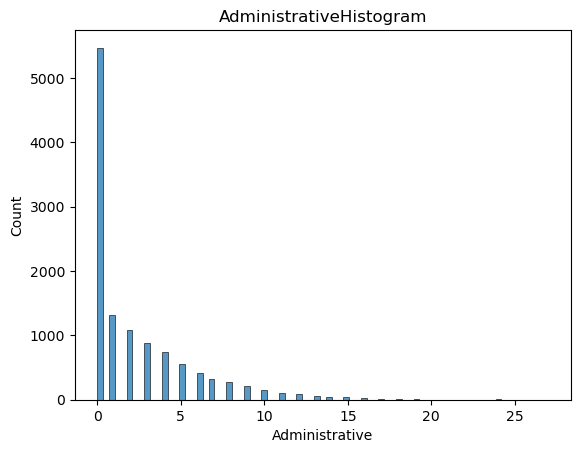

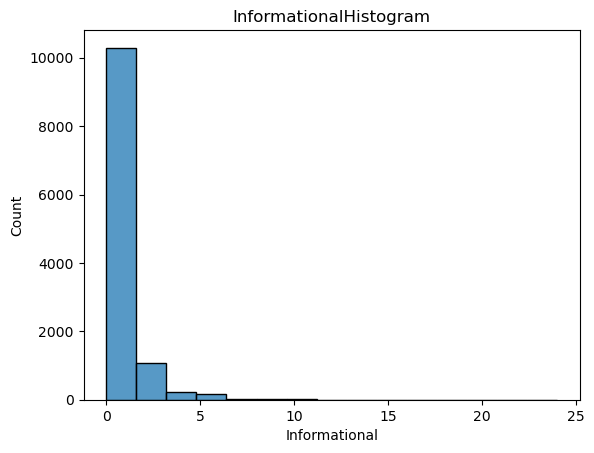

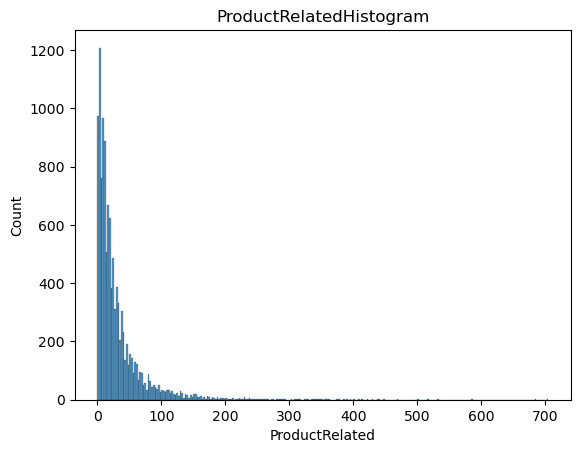

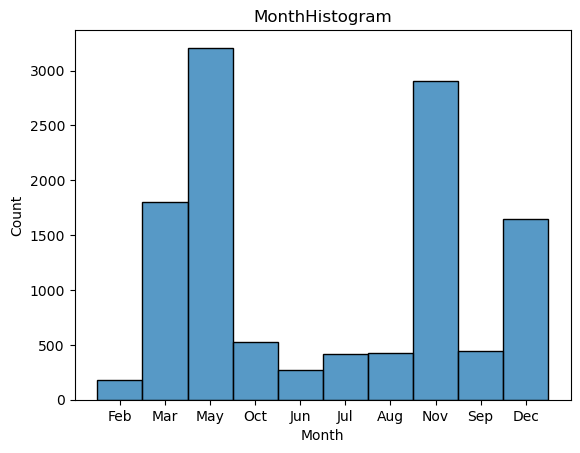

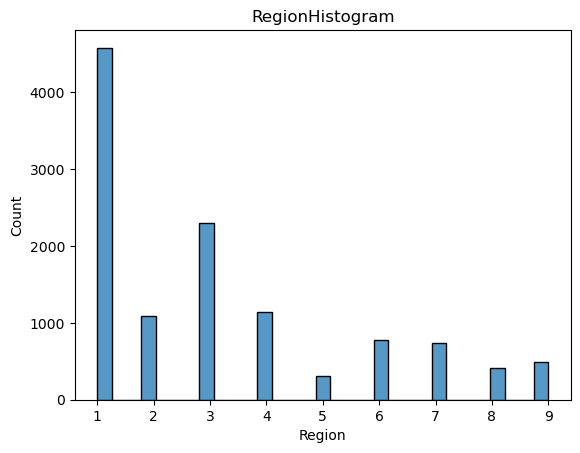

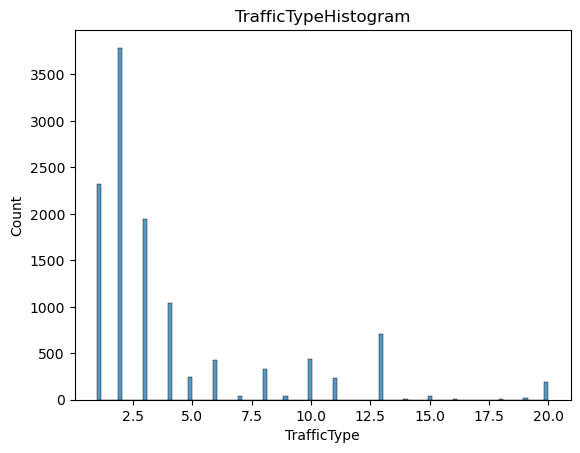

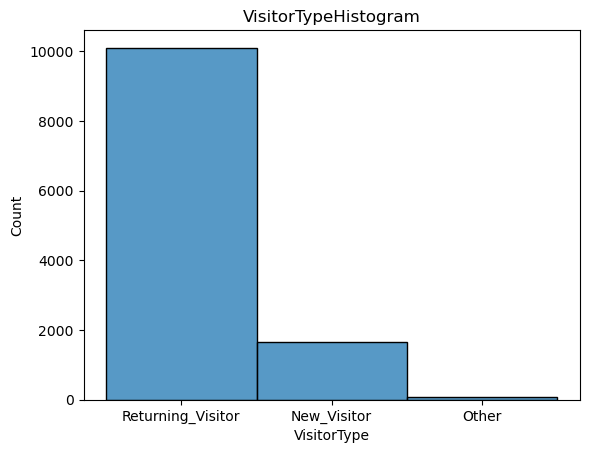

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


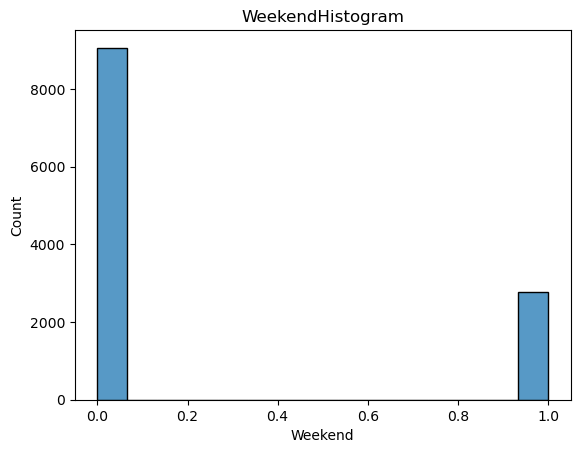

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


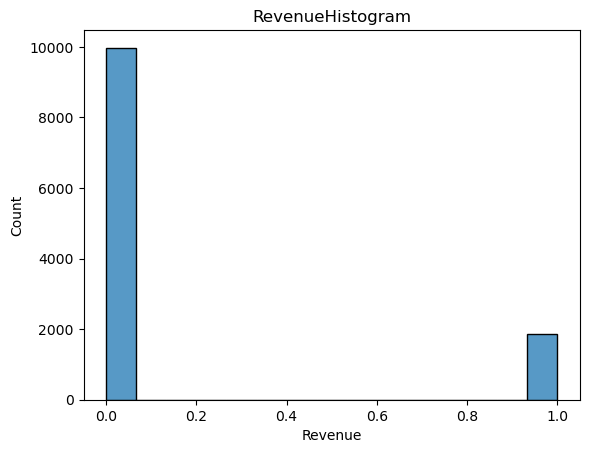

In [365]:
for key in discrete_variables:
    plt.figure()  

    sns.histplot( x=key,data=df)
    plt.title( str(key)+ " Histogram")

    plt.show()

#### Key takeways from discrete variables

- All webpage types administrative,product,and informational have a similar reciprocal distribution
- Huge variation in which months are represented
- Most users don't generate revenue
- The 'other' visitor cateogry is tiny, and nebulous based off of the readme, will drop users in this category

Same treatment for continuous variables, understood that histograms aren't
completely kosher for continuous variables, but otherwise I didn't have a good x axis to plot them by

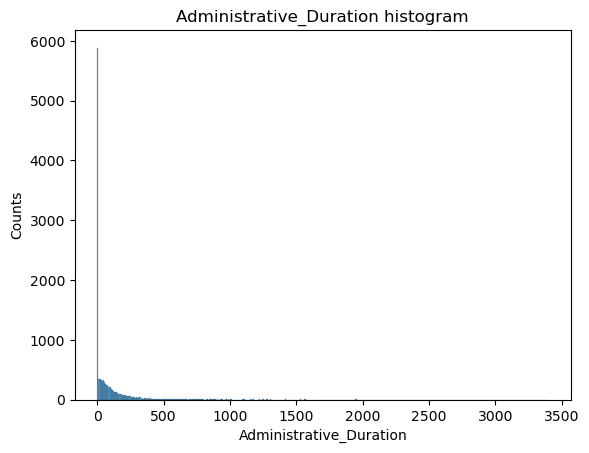

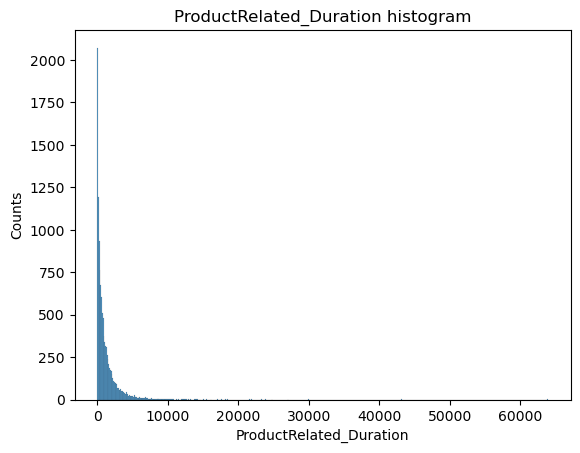

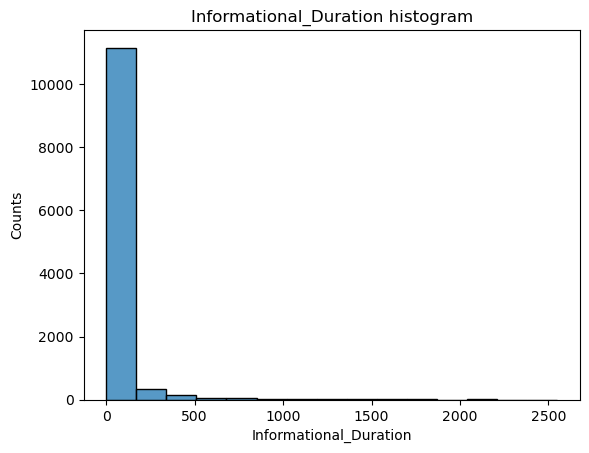

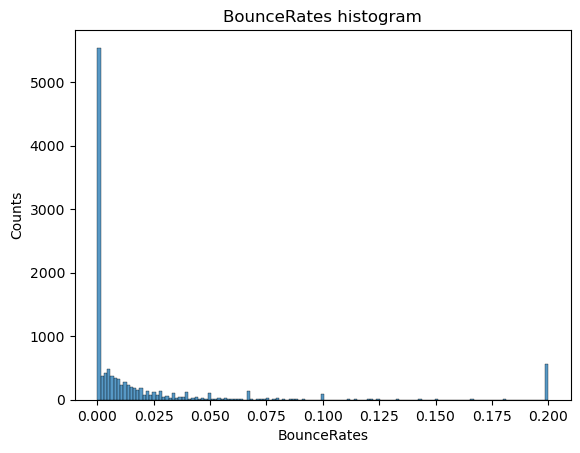

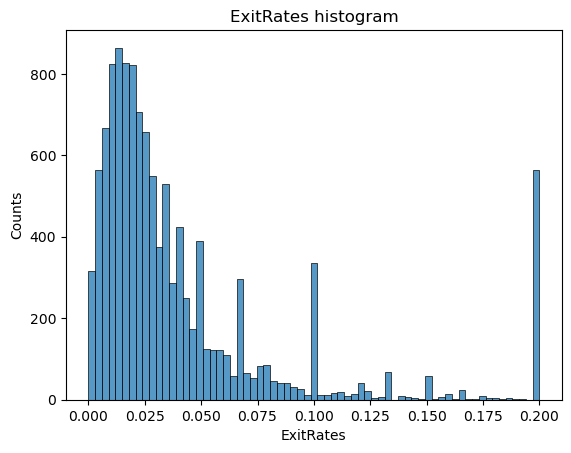

In [384]:
for variable in continuous_variables:
    plt.figure()
    parameter=variable
    sns.histplot( x=parameter,data=df)
    plt.title(parameter + str( " histogram"))
    plt.xlabel(parameter)
    plt.ylabel('Counts')
    plt.show()

#### Key takeways from continuous variables

- All webpage types administrative,product,and informational times have a similar reciprocal distribution
- Based on some external research , exit and bounce rate are metrics usually used to evaluate webpage performance
  however this dataset as tabulated focuses on user characteristics, so these two fields aren't very relevant without
  additional information regarding the webpages users interacted with, *will not use these fields for further analysis*
- ^ Same for page values (not plotted)

#### Check correlation w/ revenue for continuous variables, using pointsbisierialr instead of corrcoef since revenue is binary

Starting off with time metrics

In [391]:
total_time_correlation_result = scipy.stats.pointbiserialr(df['Revenue'], df['ProductRelated_Duration'])

correlation, p_value = total_time_correlation_result
print("Product correlation coef w/ revenue: "+str(correlation))

info_time_correlation_result = scipy.stats.pointbiserialr(df['Revenue'], df['Informational_Duration'])

correlation, p_value = info_time_correlation_result
print("Informational correlation coef w/ revenue: "+str(correlation))

admin_time_correlation_result = scipy.stats.pointbiserialr(df['Revenue'], df['Administrative_Duration'])

correlation, p_value = info_time_correlation_result
print("Admin correlation coef w/ revenue: "+str(correlation))

Product correlation coef w/ revenue: 0.14970004502756798
Informational correlation coef w/ revenue: 0.06735810984079979
Admin correlation coef w/ revenue: 0.06735810984079979


Mean ProductRelated_Duration for revenue producing customers: 1869.5050478837009
Mean ProductRelated_Duration for non-revenue producing customers: 1081.1627877985838


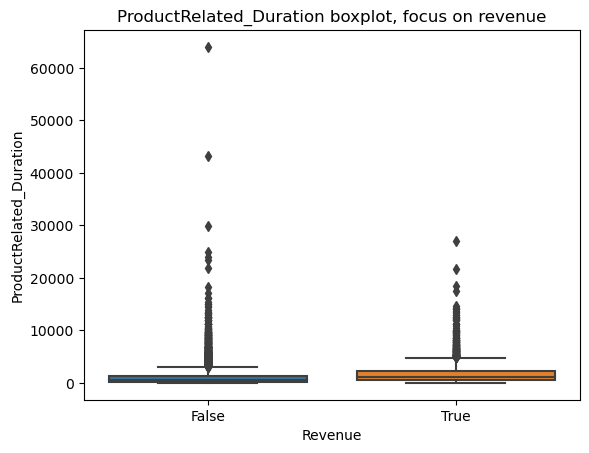

In [440]:
visualize_continuous_revenue_relationship("ProductRelated_Duration",df)

#### Product related duration has the strongest bearing on revenue, will use this moving forward for analysis and modeling

In [441]:
total_visits_correlation_result = scipy.stats.pointbiserialr(df['Revenue'], df['TotalVisits'])

correlation, p_value = total_visits_correlation_result
print("Total visits coef w/ revenue: "+str(correlation))

Total visits coef w/ revenue: 0.16142578424885562


Mean TotalVisits for revenue producing customers: 52.20583468395462
Mean TotalVisits for non-revenue producing customers: 31.594627105052126


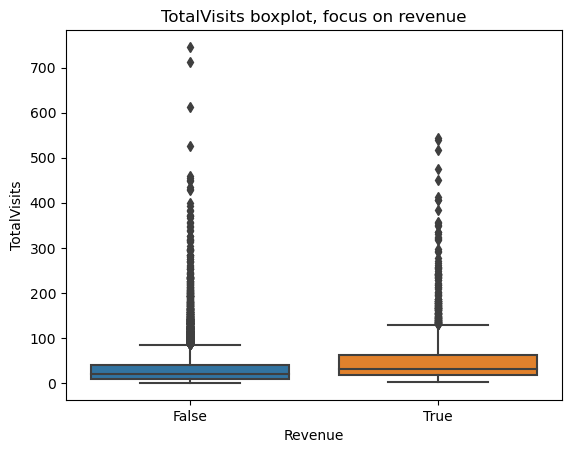

In [442]:
visualize_continuous_revenue_relationship("TotalVisits",df)

## To investigate categorical variables, calculate/plot percent revenue for various fields to guide future modeling

#### strong dependence on traffic type, will use this for modeling going forward

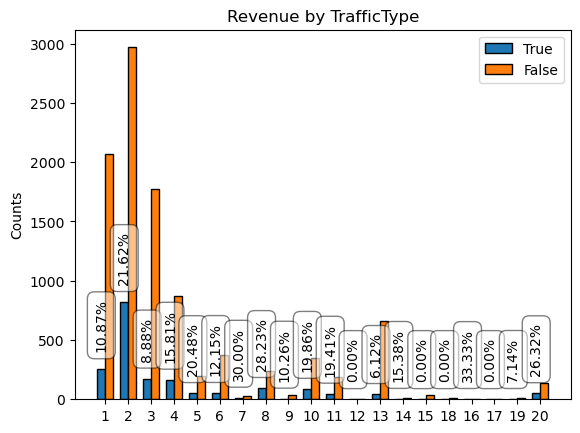

In [392]:
traffic_type_dict=plot_bar_chart(df,"TrafficType","Revenue")

#### strong dependence on Month, will use this for modeling going forward 


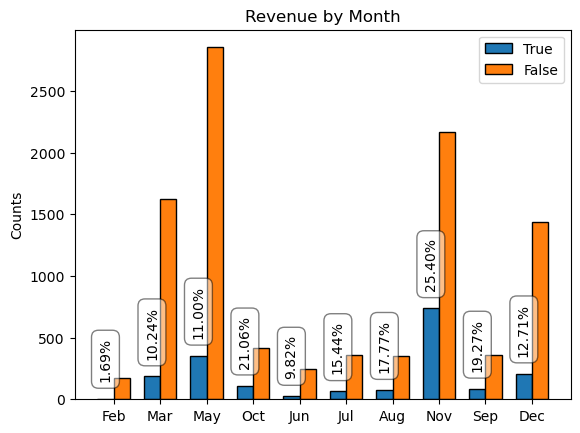

In [393]:
month_dict=plot_bar_chart(df,"Month","Revenue")

#### Region has almost no relation to revenue, won't use this for modeling

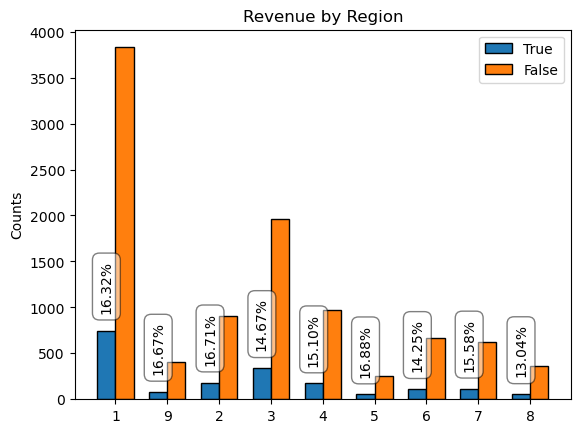

In [396]:
region_dict=plot_bar_chart(df,"Region","Revenue")

#### visitor type also has a strong relation

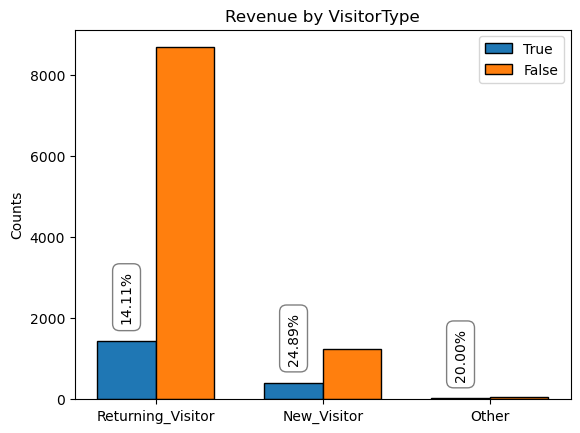

In [398]:
visitor_type_dict=plot_bar_chart(df,"VisitorType","Revenue")

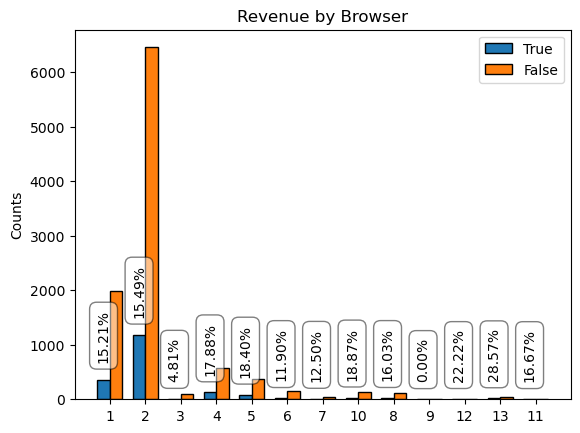

In [402]:
browser_dict=plot_bar_chart(df,"Browser","Revenue")

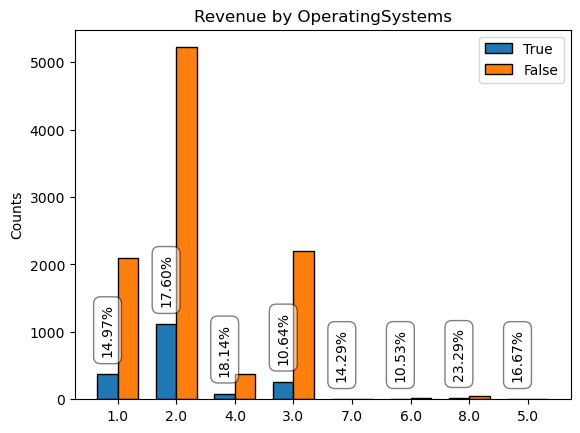

In [403]:
browser_dict=plot_bar_chart(df,"OperatingSystems","Revenue")

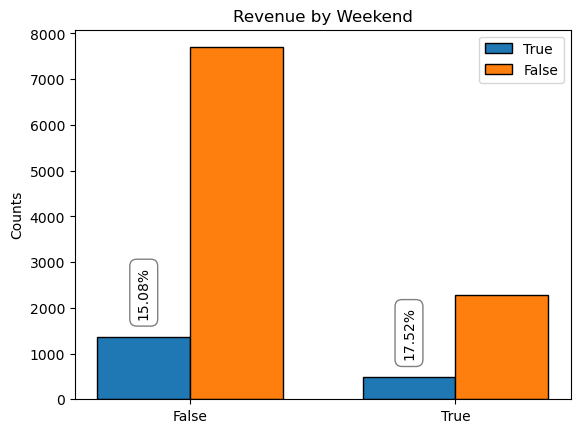

In [405]:
weekend_dict=plot_bar_chart(df,"Weekend","Revenue")

# Summary of recommmendations for analysis from modeling

Variables which have a strong / medium bearing on revenue and should be used for modeling:

-ProductRelated_Duration
-Month
-TrafficType
-VisitorType
-TotalVisits

Variables which show weak to no relation, and should not be used

-Administrative_Duration
-Informational_Duration
-Region
-Operating system
-Browser
-Weekend


Variables which are not recommended to be used based on a fundamental issue by interpretation of the readme:

Exit/BounceRates - This metric has been flattened and pertains to webpage analytics and shouldn't be used for customer prediction & clustering

SpecialDay - The way I interpreted the readmen readme, special day would be relevant if the rows were discretized by day, however as the observations are per user per month this just indicates if there's a special day(s) that the user visited during the given month that the user was observed, so it's more straightforward to just use the month for modeling.


PageValues - Same issue as with exit/bounce rate, also runs of the risk of being highly correlated with revenue by nature, and could skew modeling results





Exporting grouped data for future modeling

In [375]:


df_5_or_more = gdf[gdf['TimeBin'] >= 5]
gdf = gdf[gdf['TimeBin'] < 4]
aggregated_row = {'TimeBin': 6, 'sum': df_5_or_more['sum'].sum(), 'count': df_5_or_more['count'].sum(), 'NormalizedRevenue': df_5_or_more['sum'].sum()/df_5_or_more['count'].sum()}

# Append the aggregated row to the df_less_than_10 dataframe
gdf = gdf.append(aggregated_row, ignore_index=True)
del(df_5_or_more) ## just for when I'm moving around in the notebook, it's possible to aggregate if I ran this same block
                  ## twice if I didn't delete
    
time_bin_dict={}
for i in range(0,len(gdf)):
    time_bin_dict[i]=gdf["NormalizedRevenue"][i]
    
    #combined_dict = {key: value for d in [time_bin_dict, traffic_type_dict, month_dict,region_dict,visitor_type_dict] for key, value in d.items()}
big_dict={"time_bin":time_bin_dict,"traffic_type":traffic_type_dict,"month":month_dict,"region":region_dict,"visitor":visitor_type_dict}
# Save as JSON
with open('grouped_data.json', 'w') as file:
    json.dump(big_dict, file)

C:\Users\oliwa\AppData\Local\Temp\ipykernel_9904\3201042130.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(aggregated_row, ignore_index=True)


# Clustering

Based on the previous analysis, it's clear that time spent on product related webpages , traffic type, total number of visits and new vs returning users are key factors in terms of if a users ends up generating revenue. These fields are also good candidates for clustering, as there is a chance that different customer segments may be uncovered. 

Since month also showed a a strong correlation with revenue, for accurate clustering, I filtered the dataset to only contain months which show a similar percent revenue, removing a large portion of the temporal dependence which could increase the noise when clustering.

In terms of the clustering algorithim , because I didn't have a good intuition as to the number of clusters to expect or the estimated distance between clustered (especially with 4 dimmensions), I elected to use HDBSCAN, which is a hierarchical variation of DBSCAN. 

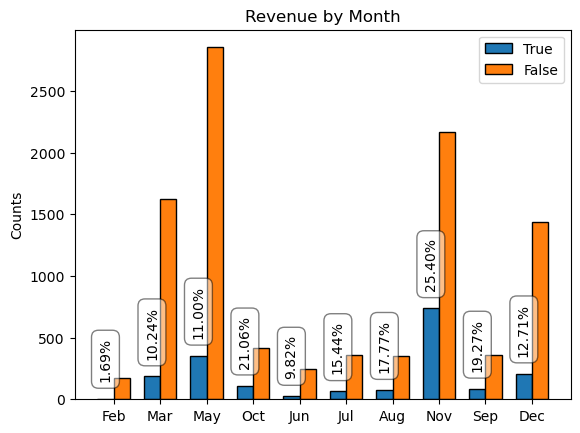

In [420]:
month_dict=plot_bar_chart(df,"Month","Revenue")

In [444]:
similar_months=['Mar','May','Jun','Jul','Dec']

In [445]:
clustering_df=df[df['Month'].isin(similar_months)]
clustering_df['VisitorTypeRecoded']= clustering_df['VisitorType'].replace(['Returning_Visitor', 'New_Visitor'], [0, 1])
clustering_df=clustering_df[clustering_df['VisitorType']!="Other"]

C:\Users\oliwa\AppData\Local\Temp\ipykernel_9904\3111766140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['VisitorTypeRecoded']= clustering_df['VisitorType'].replace(['Returning_Visitor', 'New_Visitor'], [0, 1])


In [450]:
print(len(clustering_df))
clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
cluster_keys=["TotalTime","TrafficType","TotalVisits","VisitorTypeRecoded"]
cluster_groups=clusterer.fit_predict(clustering_df[cluster_keys])
print(len(cluster_groups))
clustering_df['cluster_group'] = cluster_groups
# Applying HDBSCAN clustering
  #

7296
7296


In [451]:
np.unique(cluster_groups) 
#check how many groups there are, group -1 is the noise group which doesn't belong to any one cluster

array([-1,  0,  1,  2,  3], dtype=int64)

In [452]:
# create separate dataframes for each cluster to enable easy computation of key metrics
g1df=clustering_df[clustering_df['cluster_group']==0]
g2df=clustering_df[clustering_df['cluster_group']==1]
g3df=clustering_df[clustering_df['cluster_group']==2]
g4df=clustering_df[clustering_df['cluster_group']==3]


clustered_df_list=[g1df,g2df,g3df,g4df]

Now to examine the characteristics of the clusters

In [461]:
for cdf in clustered_df_list:
    num_datapoints=len(cdf)
    
    print("Group"+str(np.unique(cdf['cluster_group'])))
    print("Number of users in cluster: "+ str(num_datapoints))
    print("Time avg: " + str(np.mean(cdf["TotalTime"])))
    print("Visits avg: "+ str(np.mean(cdf["TotalVisits"])))
    traffic_type_counts = cdf['TrafficType'].value_counts()
    print("traffic_type_counts")
    print(traffic_type_counts)
    num_visitors=len(cdf)
    num_new_visitors= len(cdf[cdf["VisitorType"]=="New_Visitor"])
    print("Pct New visitors: " + str( round((num_new_visitors/num_visitors)*100,3) ))
    
    
    users_w_revenue=np.sum(cdf['Revenue'])
    pct_revenue=users_w_revenue/num_datapoints
    
    print("Percentage of users w/ revenue: "+str(round(pct_revenue,5)))

    print("===================")

Group[0]
Number of users in cluster: 268
Time avg: 445.9733600488805
Visits avg: 15.294776119402986
traffic_type_counts
2     104
3      51
1      49
4      31
6       9
8       8
5       7
10      5
11      3
9       1
Name: TrafficType, dtype: int64
Pct New visitors: 25.0
Percentage of users w/ revenue: 0.12313
Group[1]
Number of users in cluster: 127
Time avg: 210.2469000451181
Visits avg: 10.149606299212598
traffic_type_counts
2    44
3    32
1    22
4    18
5     5
6     5
8     1
Name: TrafficType, dtype: int64
Pct New visitors: 14.961
Percentage of users w/ revenue: 0.0315
Group[2]
Number of users in cluster: 109
Time avg: 57.16681957174311
Visits avg: 4.495412844036697
traffic_type_counts
3    41
2    27
1    20
4    17
6     4
Name: TrafficType, dtype: int64
Pct New visitors: 4.587
Percentage of users w/ revenue: 0.02752
Group[3]
Number of users in cluster: 518
Time avg: 5.265572715565637
Visits avg: 1.8243243243243243
traffic_type_counts
1     167
3     145
2      60
4      4

In [454]:
clustering_df=clustering_df[clustering_df['cluster_group']!=-1]

### Interpretation of clustering results

Based on the sharp differences between key metrics in the clusters, it appears that the clustering has been a success. 
My interpreation for the different clusters is as follow

- Group 0, Mainly from traffic source 2 and a 3/1 , they spend alot of time, come back and purchase alot. Traffic source two may be a very well placed add

- Group 1, Similar traffic sources as group 0, spends alot of time, but rarely buys anything. These may be users who are interested but can't afford the product for example.

- Group 2, Traffic source 3 is the mode for this group, spends some amount of time, but rarely buys anything. These may be users which were hooked by the ad, never actually interested in the product.

- Group 3, Large chunk coming from traffic source 1, these users barely looks, rarely comes back and almost never buys anything. These may be users which are redirected from an annoying pop up add.



I attempted to visualize the clusters, but the dimmensionality made it difficult

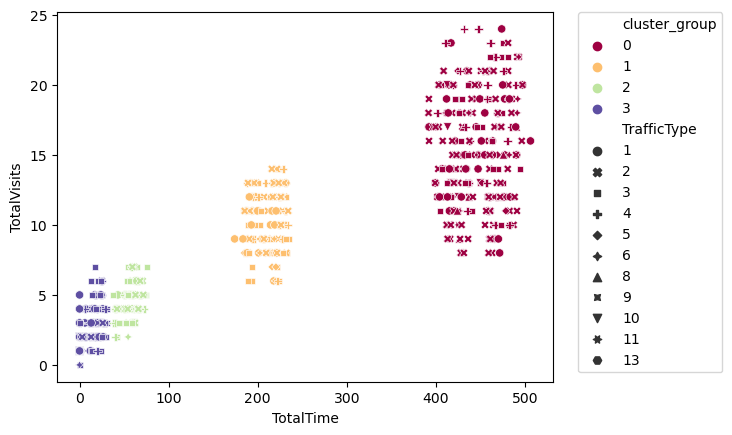

In [463]:
sns.scatterplot(data=clustering_df, x='TotalTime', y='TotalVisits', hue='cluster_group', style='TrafficType',palette='Spectral')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()